다음 예제에서는 농어의 길이, 높이, 두께 3가지 특성을 고려하여 무게를 예측하려고 한다. 그리고, 이전 포스팅처럼 단순한 직선형태가 아닌 곡선 형태를 따르기 위해 각각의 특성을 모두 제곱하여 추가할 것이다. 또한, 각 특성을 곱해 새로운 특성을 만드는 특성 공학을 이용할 것이다.

농어의 특성이 3개로 늘어났기 때문에 데이터를 복사하기 보다는 pandas를 활용하여 데이터를 다운받아 데이터 프레임에 저장할 것이다. (데이터프레임은 pandas의 자료구조이다.)

In [1]:
import pandas as pd
import numpy as np

#input
df = pd.read_csv("https://bit.ly/perch_csv")
perch_full = df.to_numpy()

#target
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

사이킷런의 변환기  

사이킷런에는 특성을 만들거나 전처리를 하기 위해 존재하는 다양한 클래스가 있는데 이 클래스를 변환기라고 부른다. 아래는 PolynomialFeatures라는 클래스를 활용하는 예시 코드이다. PolynomialFeatures는 각 특성을 제곱한 항을 추가하고 각 특성끼리 서로 곱한 항을 추가한다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

#결과: [[1. 2. 3. 4. 6. 9.]]

[[1. 2. 3. 4. 6. 9.]]


2와 3이라는 두개의 특성을 변환할 경우, 각각 제곱한 4와 9, 그리고 둘을 곱한 6이 추가되었다. 추가로 1이 존재하는데 그 이유는 다음과 같다. 

먼저 선형 방정식은 무게 = a*길이+b*높이+c*두께+절편*1로 구성된다. 따라서, 해당 방정식의 특성은 (길이, 높이, 두께, 1)이 되어서 절편항이 자동으로 추가된 것이다. 하지만, 굳이 이렇게 특성을 만들 필요가 없으므로 아래와 같이 include_bias=False 옵션을 주면 절편항이 생성되는 것을 막을 수 있다. 

In [7]:

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

#결과: [[2. 3. 4. 6. 9.]]

[[2. 3. 4. 6. 9.]]


In [9]:
#실제 훈련, 테스트값 변환

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)

train_poly = poly.transform(train_input)
# fit 메서드는 특성의 조합만 준비하기 때문에 따로 fit 구하지 않아도 됨
# 그리고 훈련 세트를 기준으로 테스트 세트를 변환하는 습관을 들이는 것이 좋음
test_poly = poly.transform(test_input)


# 각 특성값이 어떤 결과로 나왔는지 확인 가능
poly.get_feature_names_out() 
#['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
#이제 실제 다중 회귀 모델을 훈련할 것이다. 다중 회귀 모델을 훈련시키는 것은 선형 회귀 모델을 훈련하는 것과 같다. 
#다만 여러 개의 특성을 사용하여 선형 회귀를 수행할 뿐이다.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#훈련 세트: 0.9903183436982124
#테스트 세트: 0.9714559911594132

0.9903183436982125
0.9714559911594155


훈련 세트에 대해서는 점수가 매우 높아졌다. 특성이 늘어나 선형 회귀의 정확도가 더 높아졌기 때문이다. 테스트 세트의 경우는 높아지지 않았지만 길이만 사용 했을 때 존재한 과소 적합의 문제는 더 이상 나타나지 않는다.

 
이렇게 보면 단순히 특성의 개수만 늘리면 정확도가 더욱 높아질 것으로 예상된다. degree 옵션을 통해 구현 가능하다.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) #(42,55) 55개로 특성이 늘어남

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#훈련 세트:0.9999999999991096
#테스트 세트:-144.40579242335605

(42, 55)
0.9999999999938143
-144.40744533753661


실제 훈련 세트는 매우 높아졌다. 하지만 테스트 세트의 경우 값이 이상하다. 이유는 훈련 세트에 대해 거의 완벽하게 학습을 하게 되지만 반대로 너무 과대 적합하게 되어 테스트 세트에는 적합하지 않는 것이다.

 

규제
위를 방지하기 위한 방법으로 규제가 존재한다. 규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하는 것을 방지한다. 즉, 훈련 세트에 과대 적합하지 않도록 하는 것이다. 이를 가능하게 하는 방법은 특성에 곱해지는 계수(weight)의 값을 작게 만드는 일이다.

In [13]:
#규제 이전에 특성의 스케일에 대해서 고려해야 한다. 각 특성 별로 스케일이 정규화되지 않으면 특정한 특성 하나가 타깃에 매우 많은 영향을 미칠 수 있다. 
#사이킷런에서는 StandardScaler 클래스를 통해 이전 포스팅보다 더 간단하게 정규화를 할 수 있다.

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) #(42,55) 55개로 특성이 늘어남

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

(42, 55)
0.9999999999938143
-144.40744533753661


릿지(Ridge) 회귀와 라쏘(Lasso) 회귀  
선형 회귀 모델에 규제를 추가한 모델을 릿지/라쏘 선형 회귀라고 부른다. 릿지의 경우 계소를 제곱한 값을 기준으로 규제하고, 라쏘의 경우 계수의 절댓값을 기준으류 규제한다. 일반적으로 릿지를 더 많이 사용하는 편이다. 

 

최종적으로 위해서 특성 공학, 정규화 된 훈련 세트와 테스트 세트에 릿지를 적용한 결과이다.

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

#훈련 세트: 0.9896101671037343
#테스트 세트: 0.9790693977615398

0.9896101671037343
0.979069397761539


 결과를 보면 훈련 세트의 점수가 낮아지고 테스트 세트 점수가 정상으로 돌아와 과대 적합이 사라졌다. 

 

그리고 릿지와 라쏘 모델을 사용할 때 규제의 정도를 임의로 결정할 수 있다. alpha 값으로 조절 가능한데 이 값과 규제의 정도가 비례한다. 즉, alpha가 커지면 규제가 강해져 과소적합되고, 작아지면 규제가 적어져 과대적합된다.

 

적절한 alpha 값을 찾기 위해서는 alpha값에 대한 R^ 그래프를 그려 보는 것이다.



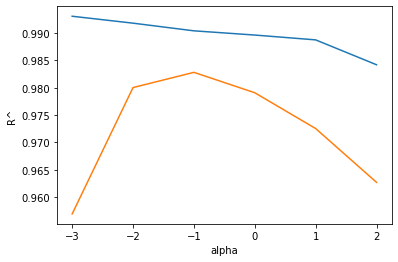

In [25]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) 
    ridge.fit(train_scaled,train_target) #릿지 학습
    train_score.append(ridge.score(train_scaled, train_target)) #훈련 세트 점수 저장
    test_score.append(ridge.score(test_scaled, test_target)) #테스트 세트 점수 저장

#log10은 그래프 보기 편하게 하기 위함
plt.plot(np.log10(alpha_list), train_score) 
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^')
plt.show()

In [17]:
#위 결과를 보면 -1 근처에서 훈련 세트와 테스트 세트의 차이가 가장 적다. 따라서 적절한 alpha 값은 log10x=-1인 0.1이다. 
#alpha=0.1을 통해 최종 훈련을 하는 코드는 아래와 같다.

ridge = Ridge(alpha=0.1) 
ridge.fit(train_scaled,train_target) 
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

#훈련 세트: 0.9903815817570366
#테스트 세트: 0.9827976465386927

0.9903815817570369
0.9827976465386932


In [18]:
#라쏘

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421886


/Users/kimdogyung/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kimdogyung/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kimdogyung/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

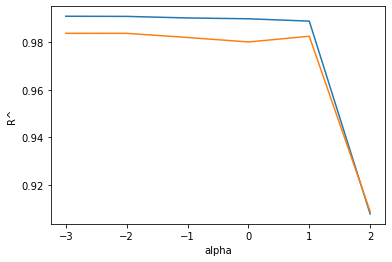

In [29]:
lasso_train_score = []
lasso_test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha) 
    lasso.fit(train_scaled, train_target) #라쏘 학습
    lasso_train_score.append(lasso.score(train_scaled, train_target)) #훈련 세트 점수 저장
    lasso_test_score.append(lasso.score(test_scaled, test_target)) #테스트 세트 점수 저장

#log10은 그래프 보기 편하게 하기 위함
plt.plot(np.log10(alpha_list), lasso_train_score) 
plt.plot(np.log10(alpha_list), lasso_test_score)
plt.xlabel('alpha')
plt.ylabel('R^')
plt.show()

#>>출력물은 규제를 하는데 학습량이 부족하다는 것을 의미한다.

In [31]:
for i in alpha_list:
    lasso=Lasso(alpha=i,max_iter=10000) 
    lasso.fit(train_scaled,train_target)

    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target)) 
    
#max_iter=10000을 통해서 학습량을 10000번으로 늘린다.
#그래도 학습량이 부족하다고 나올 수 있다.

/Users/kimdogyung/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kimdogyung/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [32]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

0.9888067471131866
0.9824470598706695
40
